In [3]:
import pandas as pd
import tmplot as tmp
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_theme(palette="pastel")

In [10]:
work_dir = "C:/Users/fabia/OneDrive - Otto-Friedrich-Universität Bamberg/Master/Masterarbeit/Data"

In [16]:
comments_df = pd.read_json(work_dir + "/Comment/comments_with-sentiment.json")
replies_df = pd.read_json(work_dir + "/Comment/replies_with-sentiment.json")

In [14]:
video_topics = pd.read_csv(work_dir + "/Video/video_topics.csv")

In [15]:
print(video_topics.head())

   topic     video_id                                              title  \
0      2  vYzSzy6IwRI  E-AUTO mit 100% WASSERKRAFT laden | Prototyp n...   
1      2  Ad8knG-9l2A  Breaking Elektro-News: Xiaomi plant Elektroaut...   
2      1  SVyPVVXFpkU  Model 3 Facelift (SR & LR): Analyse der Tests ...   
3      3  z67yc8r2WNw  Probleme und Mängel an meinem Audi E-Tron, Upd...   
4      0  71SbVFBhaZk  STAT E-STICS #12 | KIA EV6 und alle Elektroaut...   

           published_at                channel_id  view_count  like_count  \
0  2021-04-01T08:00:27Z  UCaCaZ-vKtnMG2_FKmEePChQ      4217.0       493.0   
1  2021-04-01T05:00:02Z  UCsNdsFTTBj5jcRJSWeJ8-Xg      7432.0       613.0   
2  2021-04-01T16:15:55Z  UCasePAQ_q7tbUGybICCj4NQ      5530.0       342.0   
3  2021-04-02T17:11:32Z  UCddkvrnYqGRfODPMUQqisiw      6389.0       291.0   
4  2021-04-02T15:30:01Z  UCDDj2GWklzZ09X7R9OtsX3Q     38400.0       508.0   

   comment_count  job  id  valid  \
0            193    0   0  valid   
1       

In [18]:
print(comments_df.head())
print(replies_df.head())

   level_0  index  table_id     video_id  job page       date      author  \
0        0      0     10061  kjwiFMxRotQ   85      2022-03-08  Car Maniac   
1        1      1     10062  kjwiFMxRotQ   85      2022-03-08      Dennis   
2        2      2     10063  kjwiFMxRotQ   85      2022-03-08   Karl Napp   
3        3      3     10064  kjwiFMxRotQ   85      2022-03-08       Ed Sa   
4        4      4     10065  kjwiFMxRotQ   85      2022-03-08  MetalJaska   

   likes   published     updated  reply_count                  comment_id  \
0    437  2022-02-25  2022-02-25          108  UgxrA7-S9AiWwCGK8nh4AaABAg   
1      0  2022-03-08  2022-03-08            0  UgwlX0wQuL4vSc2dUu14AaABAg   
2      1  2022-03-08  2022-03-08            0  UgwxGcXqAkDNrle96V54AaABAg   
3      0  2022-03-08  2022-03-08            0  Ugzo6Qq8uCYpTJKGZFZ4AaABAg   
4      0  2022-03-08  2022-03-08            0  UgyHMgEX65XJeuwXlBZ4AaABAg   

                                             comment  \
0  <b>Liebe Freund

In [247]:
merged_comments = pd.merge(video_topics,comments_df,on='video_id',how='right')


merged_replies = pd.merge(video_topics,replies_df,on='video_id',how='right')

In [248]:
def f(row):
    float_compound = float(row['compound'])
    if float_compound >= 0.05:
        val = 'Positive'
    elif float_compound <= -0.05:
        val = 'Negative'
    else:
        val = 'Neutral'
    return val

In [249]:
merged_comments['sentiment'] = merged_comments.apply(f, axis=1)
merged_replies['sentiment'] = merged_replies.apply(f, axis=1)

In [250]:
merged_comments['published'] = pd.to_datetime(merged_comments['published'], errors='coerce')
merged_replies['published'] = pd.to_datetime(merged_replies['published'], errors='coerce')


merged_comments['published'] = merged_comments['published'].dt.strftime('%d-%m-%Y')
merged_replies['published'] = merged_replies['published'].dt.strftime('%d-%m-%Y')
print(merged_comments['published'])
print(merged_replies['published'])

0         25-02-2022
1         08-03-2022
2         08-03-2022
3         08-03-2022
4         08-03-2022
             ...    
532519    30-07-2021
532520    30-07-2021
532521    30-07-2021
532522    30-07-2021
532523    30-07-2021
Name: published, Length: 532524, dtype: object
0         06-03-2022
1         04-03-2022
2         03-03-2022
3         03-03-2022
4         06-03-2022
             ...    
400777    03-08-2021
400778    03-08-2021
400779    30-07-2021
400780    30-07-2021
400781    30-07-2021
Name: published, Length: 400782, dtype: object


In [251]:
topic_0_df = merged_comments.loc[merged_comments['topic'] == 0]
topic_1_df = merged_comments.loc[merged_comments['topic'] == 1]
topic_2_df = merged_comments.loc[merged_comments['topic'] == 2]
topic_3_df = merged_comments.loc[merged_comments['topic'] == 3]

topic_0 = topic_0_df.groupby(['sentiment']).size()
topic_1 = topic_1_df.groupby(['sentiment']).size()
topic_2 = topic_2_df.groupby(['sentiment']).size()
topic_3 = topic_3_df.groupby(['sentiment']).size()

positive_0 = topic_0['Positive']
positive_1 = topic_1['Positive'] 
positive_2 = topic_2['Positive'] 
positive_3 = topic_3['Positive'] 

neutral_0 = topic_0['Neutral']
neutral_1 = topic_1['Neutral']
neutral_2 = topic_2['Neutral']
neutral_3 = topic_3['Neutral']

negative_0 = topic_0['Negative']
negative_1 = topic_1['Negative']
negative_2 = topic_2['Negative']
negative_3 = topic_3['Negative']

topic_labels = ['Positive', 'Neutral', 'Negative' ]
topic_0_data = [positive_0, neutral_0, negative_0]
topic_1_data = [positive_1, neutral_1, negative_1]
topic_2_data = [positive_2, neutral_2, negative_2]
topic_3_data = [positive_3, neutral_3, negative_3]

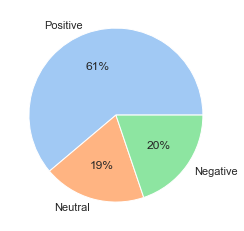

In [175]:
plt.pie(topic_0_data, labels = topic_labels, colors = colors, autopct='%.0f%%')
plt.show()

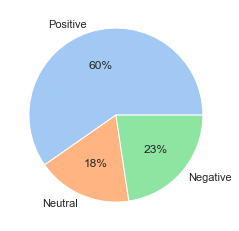

In [176]:
plt.pie(topic_1_data, labels = topic_labels, colors = colors, autopct='%.0f%%')
plt.show()

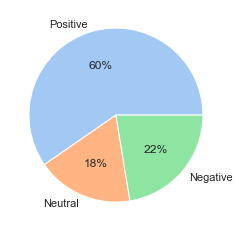

In [177]:
plt.pie(topic_2_data, labels = topic_labels, colors = colors, autopct='%.0f%%')
plt.show()

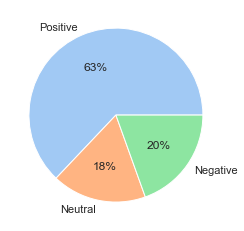

In [178]:
plt.pie(topic_3_data, labels = topic_labels, colors = colors, autopct='%.0f%%')
plt.show()

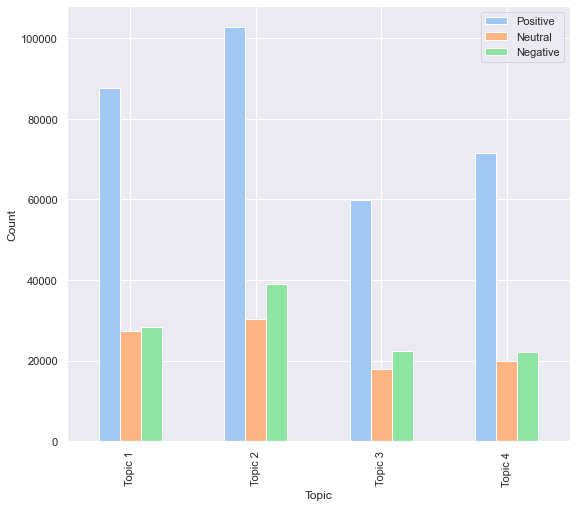

In [179]:
data=[["Topic 1",positive_0,neutral_0,negative_0],
      ["Topic 2",positive_1,neutral_1,negative_1],
      ["Topic 3",positive_2,neutral_2,negative_2],
      ["Topic 4",positive_3,neutral_3,negative_3]
     ]
df=pd.DataFrame(data,columns=["Topic","Positive","Neutral","Negative"])
df.plot(ylabel = "Count", x="Topic", y=["Positive", "Neutral", "Negative"], kind="bar",figsize=(9,8))
plt.show()

In [282]:
topic_0_df['published'] = pd.to_datetime(topic_0_df['published'], format='%d-%m-%Y', errors='coerce')
topic_1_df['published'] = pd.to_datetime(topic_1_df['published'], format='%d-%m-%Y', errors='coerce')
topic_2_df['published'] = pd.to_datetime(topic_2_df['published'], format='%d-%m-%Y', errors='coerce')
topic_3_df['published'] = pd.to_datetime(topic_3_df['published'], format='%d-%m-%Y', errors='coerce')

start_20 = datetime.datetime.strptime('01-01-2020', '%d-%m-%Y')
end_20 = datetime.datetime.strptime('31-12-2020', '%d-%m-%Y')

start_21 = datetime.datetime.strptime('01-01-2021', '%d-%m-%Y')
end_21 = datetime.datetime.strptime('31-12-2021', '%d-%m-%Y')

start_22 = datetime.datetime.strptime('01-01-2021', '%d-%m-%Y')
end_22 = datetime.datetime.strptime('31-12-2021', '%d-%m-%Y')


topic_0_2020 = topic_0_df.loc[(topic_0_df['published']>=start_20) & (topic_0_df['published']<= end_20)]
topic_1_2020 = topic_1_df.loc[(topic_1_df['published']>=start_20) & (topic_1_df['published']<= end_20)]
topic_2_2020 = topic_2_df.loc[(topic_2_df['published']>=start_20) & (topic_2_df['published']<= end_20)]
topic_3_2020 = topic_3_df.loc[(topic_3_df['published']>=start_20) & (topic_3_df['published']<= end_20)]

topic_0_2021 = topic_0_df.loc[(topic_0_df['published']>=start_21) & (topic_0_df['published']<= end_21)]
topic_1_2021 = topic_1_df.loc[(topic_1_df['published']>=start_21) & (topic_1_df['published']<= end_21)]
topic_2_2021 = topic_2_df.loc[(topic_2_df['published']>=start_21) & (topic_2_df['published']<= end_21)]
topic_3_2021 = topic_3_df.loc[(topic_3_df['published']>=start_21) & (topic_3_df['published']<= end_21)]

topic_0_2022 = topic_0_df.loc[(topic_0_df['published']>=start_22) & (topic_0_df['published']<= end_22)]
topic_1_2022 = topic_1_df.loc[(topic_1_df['published']>=start_22) & (topic_1_df['published']<= end_22)]
topic_2_2022 = topic_2_df.loc[(topic_2_df['published']>=start_22) & (topic_2_df['published']<= end_22)]
topic_3_2022 = topic_3_df.loc[(topic_3_df['published']>=start_22) & (topic_3_df['published']<= end_22)]

C:\Users\fabia\AppData\Local\Temp\ipykernel_9840\2110387253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_0_df['published'] = pd.to_datetime(topic_0_df['published'], format='%d-%m-%Y', errors='coerce')
C:\Users\fabia\AppData\Local\Temp\ipykernel_9840\2110387253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_1_df['published'] = pd.to_datetime(topic_1_df['published'], format='%d-%m-%Y', errors='coerce')
C:\Users\fabia\AppData\Local\Temp\ipykernel_9840\2110387253.py:3: SettingWithCopyWar

In [278]:
print(topic_1_2022["published"])

39081    2021-12-21
39082    2021-12-15
39083    2021-12-12
39084    2021-12-12
39085    2021-12-09
            ...    
532410   2021-07-26
532411   2021-07-26
532412   2021-07-26
532413   2021-07-26
532414   2021-07-26
Name: published, Length: 101520, dtype: datetime64[ns]


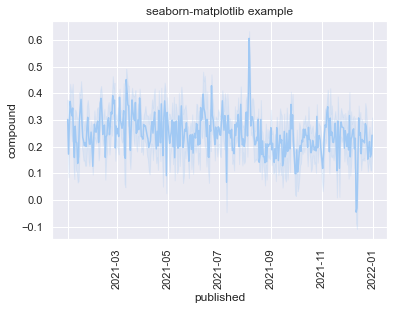

In [296]:
plot = sns.lineplot(x="published", y="compound", data=topic_1_2022)
plt.xticks(rotation=90)
plt.title('seaborn-matplotlib example')


for label in plot.xaxis.get_ticklabels()[::10]:
    label.set_visible(False)

plt.show()